In [1]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

Using TensorFlow backend.


In [2]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label == 5
        elif labels == 'mountain':
            label == 3
        
        for image_file in os.listdir(directory+r'/'+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+r'/'+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [3]:
Images, Labels = get_images(r'D:\Downloads\seg_train\seg_train') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [4]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (14034, 150, 150, 3)
Shape of Labels: (14034,)


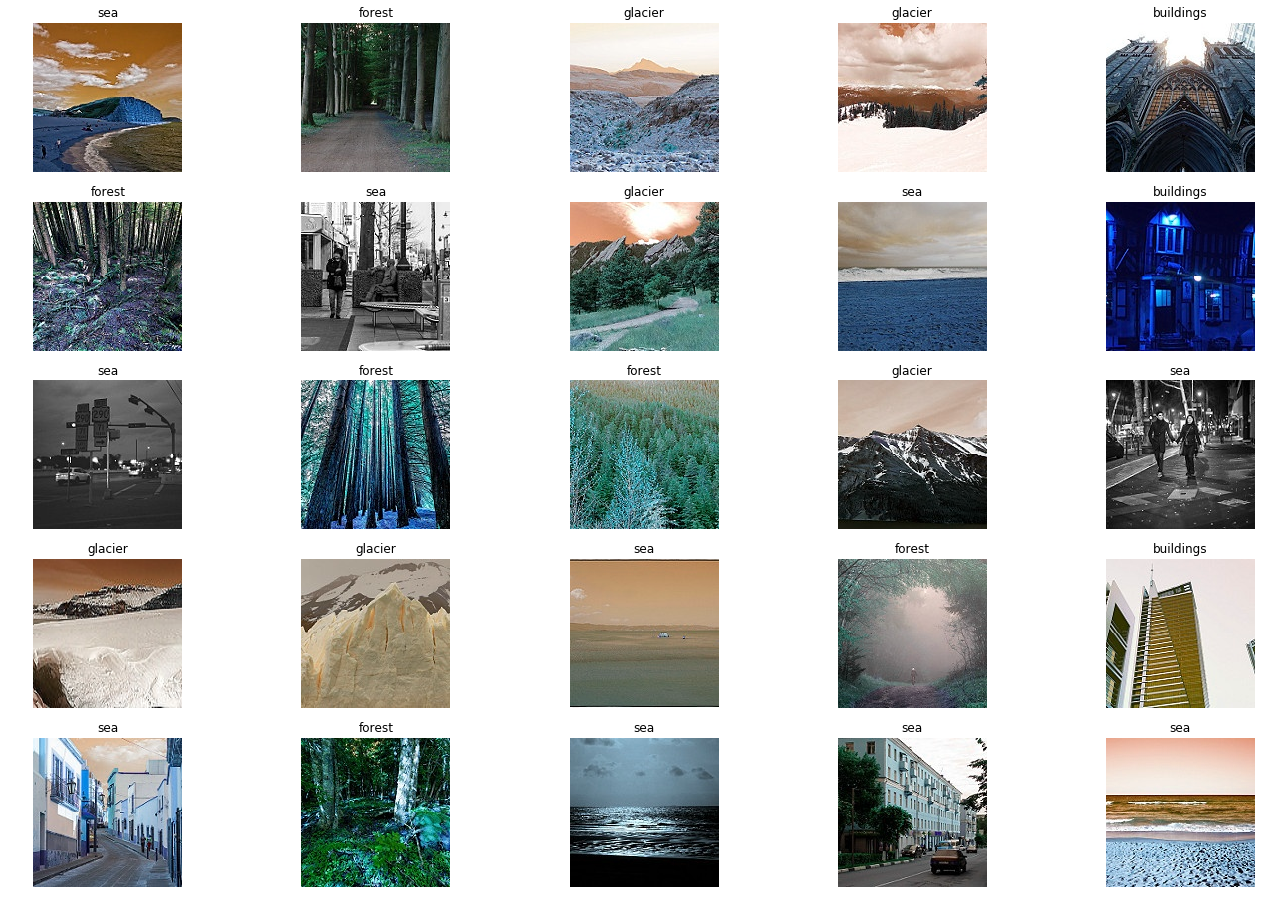

In [5]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [10]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
# SVG(model_to_dot(model).create(prog='dot', format='svg'))
# Utils.plot_model(model,to_file='model.png',show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 21, 21, 50)        45050     
__________

In [11]:
# os.environ["PATH"] += os.pathsep + r'C:\Users\klee\Downloads\graphviz-2.38\release\bin'
trained = model.fit(Images,Labels,epochs=20,validation_split=0.30)

Train on 9823 samples, validate on 4211 samples
Epoch 1/20
9823/9823 [==============================] - 61s 6ms/sample - loss: 1.2945 - acc: 0.4865 - val_loss: 0.9279 - val_acc: 0.6122
Epoch 2/20
9823/9823 [==============================] - 61s 6ms/sample - loss: 0.9411 - acc: 0.6157 - val_loss: 0.6410 - val_acc: 0.7378
Epoch 3/20
9823/9823 [==============================] - 57s 6ms/sample - loss: 0.7466 - acc: 0.7023 - val_loss: 0.5297 - val_acc: 0.7951
Epoch 4/20
9823/9823 [==============================] - 57s 6ms/sample - loss: 0.6330 - acc: 0.7581 - val_loss: 0.5215 - val_acc: 0.7984
Epoch 5/20
9823/9823 [==============================] - 57s 6ms/sample - loss: 0.5666 - acc: 0.7918 - val_loss: 0.4279 - val_acc: 0.8440
Epoch 6/20
9823/9823 [==============================] - 57s 6ms/sample - loss: 0.5104 - acc: 0.8125 - val_loss: 0.4369 - val_acc: 0.8319
Epoch 7/20
9823/9823 [==============================] - 58s 6ms/sample - loss: 0.4627 - acc: 0.8332 - val_loss: 0.3936 - val_acc: 

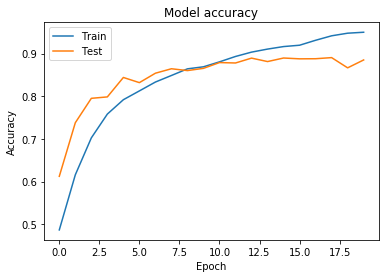

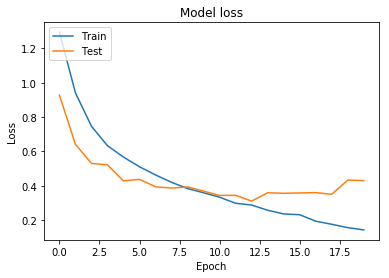

In [12]:
plot.plot(trained.history['acc'])
plot.plot(trained.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [14]:
test_images,test_labels = get_images(r'D:\Downloads\seg_test\seg_test')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

3000/3000 [==============================] - 6s 2ms/sample - loss: 0.4281 - acc: 0.8880


[0.4280705874363581, 0.888]

In [16]:
pred_images,no_labels = get_images(r'D:\Downloads\seg_pred')
pred_images = np.array(pred_images)
pred_images.shape

(7301, 150, 150, 3)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


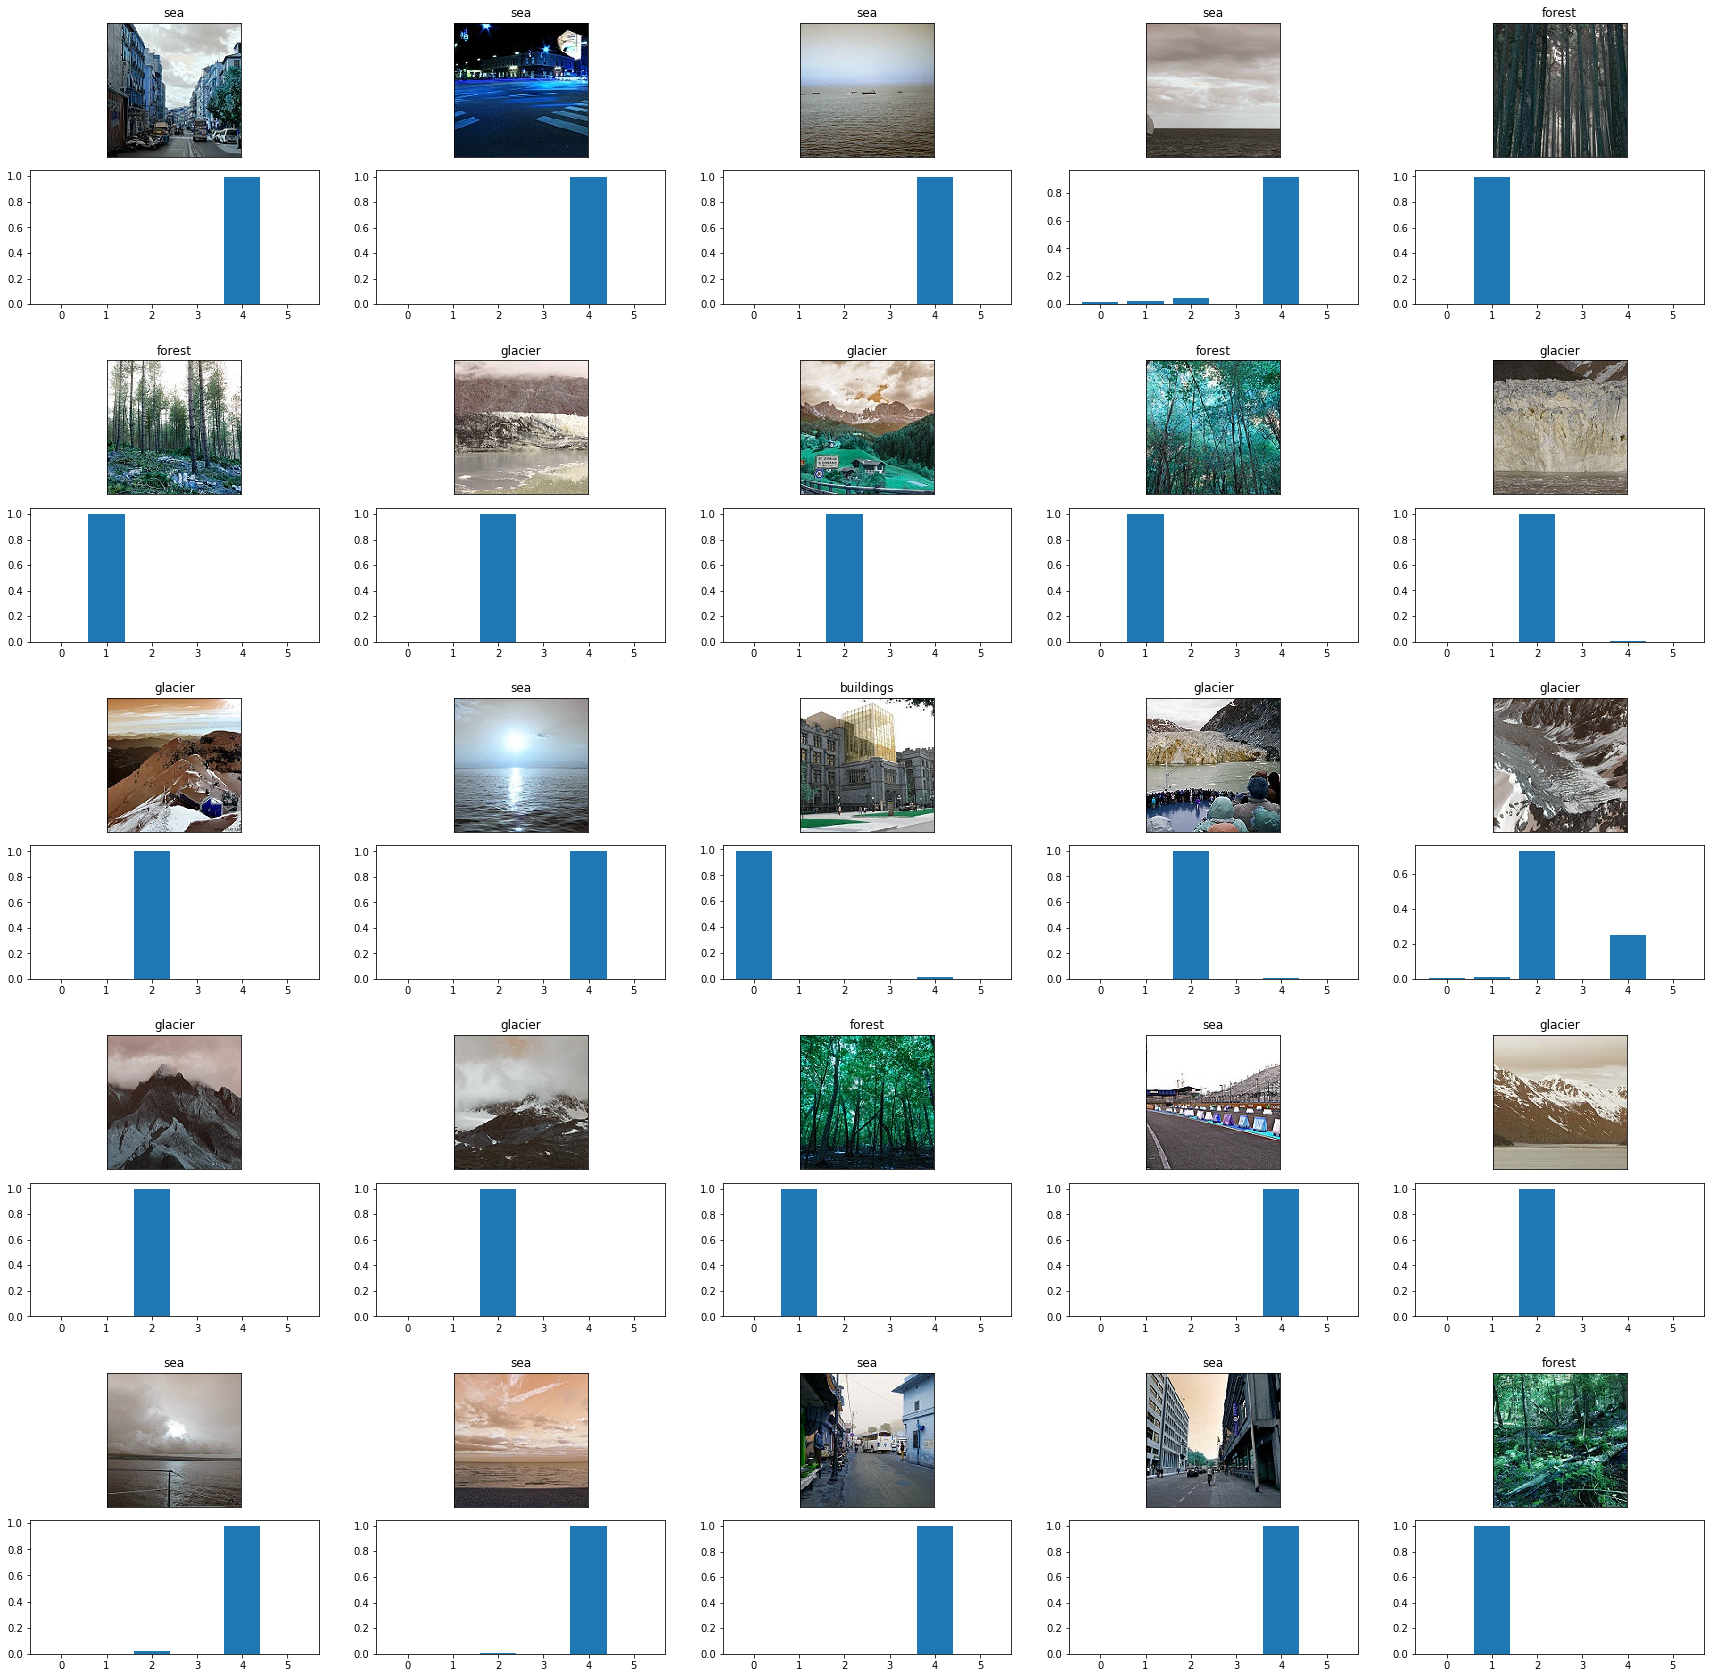

In [17]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()